# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

**Submitted by:**
* Neta Kohn
* Hadas Neuman

**GitHub link:**   
https://github.com/neumanh/Ydata-SL-Ex2



# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [132]:
import numpy as np


class Ols(object):
    """ An implementation on ordinary least squares"""

    def __init__(self):
        self.w = None

    @staticmethod
    def pad(X):
        X = np.c_[X, np.ones(X.shape[0])]
        return X

    def fit(self, X, Y):
        # remeber pad with 1 before fitting
        # Update the weight
        self.w = self._fit(X, Y)

    @staticmethod
    def _fit(X, Y):
        X = Ols.pad(X)
        w_ols = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), Y)
        return w_ols

    def predict(self, X):
        # return wx
        pred_y = self._predict(X)
        return pred_y

    def _predict(self, X):
        X = self.pad(X)
        pred_y = np.dot(X, self.w)
        return pred_y

    def score(self, X, Y):
        pred_y = self._predict(X)
        mse = np.mean((pred_y - Y)**2)
        return mse

Getting the boston housing dataset by using the scikit-learn package.

In [133]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)
print(load_boston()['DESCR'])  # To learn about the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Fitting the model. What is the training MSE?

In [134]:
ols_obj = Ols()
ols_obj.fit(X, y)
mse = ols_obj.score(X, y)
print('MSE:', mse)

MSE: 21.894831181729202


Plotting a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

In [135]:
!mkdir plots

A subdirectory or file plots already exists.


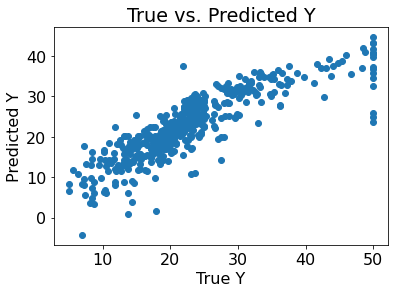

In [136]:
import matplotlib.pyplot as plt
plt.rc('font', size=16) # Enlarging font

predicted_y = ols_obj.predict(X)

plt.scatter(y, predicted_y)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('True vs. Predicted Y')

plt.savefig('plots/true_vs_pred.png')  # Saving
plt.show();



Splitting the data to 75% train and 25% test 20 times.
What is the average MSE now for train and test?

In [152]:
from sklearn.model_selection import train_test_split
train_mses = []
test_mses = []
for _ in range(20):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # Defining the OLS object and fitting
    curr_ols = Ols()
    curr_ols.fit(X_train, y_train) 
    # Evaluating the MSE scores for the train and test sets
    train_mses.append(curr_ols.score(X_train, y_train))
    test_mses.append(curr_ols.score(X_test, y_test))

print('Mean MSE score for train set:', np.mean(train_mses))
print('Mean MSE score for test set:', np.mean(test_mses))

Mean MSE score for train set: 21.443727405698567
Mean MSE score for test set: 24.334619637092484


We can see that the mean test MSE is larger than the mean train MSE. Let's test the difference significance using T-test:

In [153]:
import scipy.stats as stats

# Testing the equality of variance Levene’s test
l_w_stats, l_p_value = stats.levene(train_mses,test_mses)

# Levene’s test null hypothesis: var1=var2
if l_p_value > 0.05:
    equal_var = True
else:
    equal_var = False

# Preforming T-test
print(stats.ttest_ind(a=train_mses, b=test_mses, equal_var=equal_var))

_, t_p_value = stats.ttest_ind(a=train_mses, b=test_mses, equal_var=equal_var)

if t_p_value < 0.05:
    print('The two MSE values are significantly different')
else:
    print('The two MSE values are NOT significantly different')


Ttest_indResult(statistic=-2.52173498757591, pvalue=0.01914343975821629)
The two MSE values are significantly different


Since the above result depends on the train-test split, which has a random factor, it may change in different runs.

To Choose the right normalization type, let's examine the feature distributions

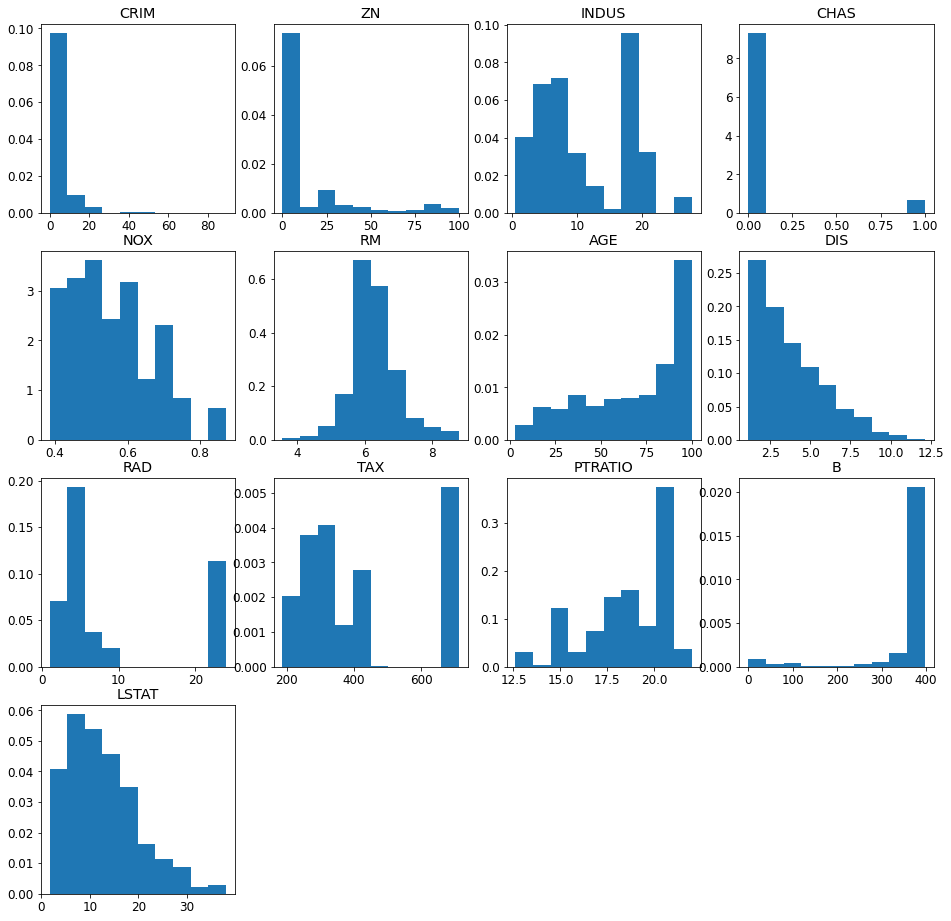

In [139]:
# Collecting the features in a dictionary (based on the variable description)

feature_dict = {
    'CRIM':    X[:,0],
    'ZN':      X[:,1],
    'INDUS':   X[:,2],
    'CHAS':    X[:,3],
    'NOX':     X[:,4],
    'RM':      X[:,5],
    'AGE':     X[:,6],
    'DIS':     X[:,7],
    'RAD':     X[:,8],
    'TAX':     X[:,9],
    'PTRATIO': X[:,10],
    'B':       X[:,11],
    'LSTAT':   X[:,12],
}

# Plotting
plt.rc('font', size=12) # Enlarging font
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

i = 0
# for key, value in feature_dict.items():

for key, value in feature_dict.items():
    cax = axs[i//4, i%4]  # Current axis
    cax.hist(value, density=True)
    cax.set_title(key)
    i += 1

# Leaving the last sublots empty
axs[-1, -1].axis('off')
axs[-1, -2].axis('off')
axs[-1, -3].axis('off')

plt.savefig('plots/feature_histograms.png')  # Saving

plt.show();

Creating Q-Q plots for the normality test

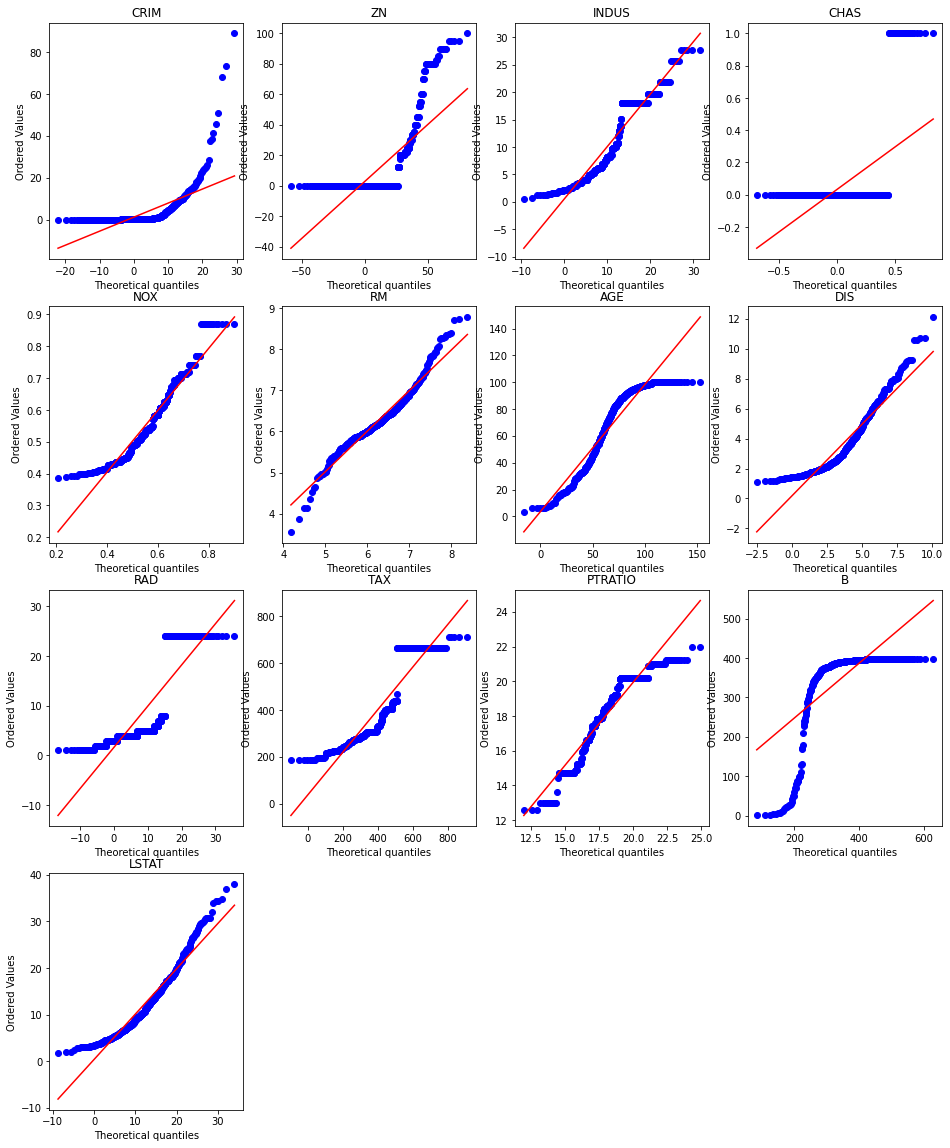

In [140]:
import scipy
# Plotting
plt.rc('font', size=10) # Enlarging font
fig, axs = plt.subplots(4, 4, figsize=(16, 20))

i = 0
# for key, value in feature_dict.items():

for key, value in feature_dict.items():
    cax = axs[i//4, i%4]  # Current axis
    #cax.hist(value, density=True)
    stats.probplot(value, dist=stats.norm, sparams=(value.mean(), value.std()), plot=cax)
    cax.set_title(key)
    i += 1

# Leaving the last sublots empty
axs[-1, -1].axis('off')
axs[-1, -2].axis('off')
axs[-1, -3].axis('off')

plt.savefig('plots/feature_norm_test.png')  # Saving

plt.show();

We can see that about half of the features seem to be normally distributed

In [141]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self.means = None
    self.stds = None

  def fit(self, X):
    self.means = np.mean(X, axis=0) # The mean of each column (=feature)
    self.stds = np.std(X, axis=0) # The STD of each column (=feature)

  def predict(self, X):
    norm_x = (X - self.means)/self.stds
    return norm_x
  
  def __str__(self):
    return f'Normalizer: means: {self.means} stds: {self.stds}'

### Gradient Descent Class

We will calculate the derivitive based on $\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$    
And the gardient descent solution is given by $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.


In [155]:
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    self.loss_history = None
    
  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    X0 = X  # Saving the original X
    if self.normalize:
        self.normalizer.fit(X)
        X = self.normalizer.predict(X)
    pad_X = self.pad(X)
    self.w = np.random.rand(pad_X.shape[1]) # Random initial weights
    w0 = np.ones(pad_X.shape[1]) # Initial weights of 1 - represents the last step
    i = 0
    self.loss_history = []
    while not self._should_stop_func(i, w0):
      w0 = self.w  # The previous step w, for early stop
      self._step(pad_X, Y)
      loss = self.score(X0, Y)  # Computing the loss
      if track_loss:
          self.loss_history.append(loss)
      if self.verbose and ((i % 10) == 0):  # Print the 10th iteration
          print(f'Iteration {i} error: {loss}')
      i += 1
    if self.verbose:
        print(f'Final step: iteration: {i} Error: {self.score(X0, Y)}')
    return self.w
  
  def _derive(self, X, Y):
    """ Derives the w """
    n = X.shape[0]
    grad_x = (2/n)*np.dot(X.T, (np.dot(X, self.w) - Y))
    return grad_x
    
  def _predict(self, X):
    if self.normalize:
        X = self.normalizer.predict(X)
    pred_y = super()._predict(X)

    return pred_y
  
  def _step(self, X, Y):
    # use w update for gradient descent
    grad_x = self._derive(X, Y)
    self.w = self.w - np.dot(self.learning_rate, grad_x)

  def _should_stop_func(self, current_step, w0, delta = 0.001):
    """Returns true if the functin shpuld stop"""
    should_stop = False
    if current_step >= self.num_iteration:
      should_stop = True
    elif (self.early_stop) and (abs(self.w - w0) <= delta).all():
      should_stop = True
    return should_stop

In [143]:
# Using OlsGD 

olsgd = OlsGd(verbose=True, learning_rate=0.1)
olsgd.fit(X, y)
olsgd.score(X, y)


Iteration 0 error: 345.66548780910506
Iteration 10 error: 27.604545627199617
Iteration 20 error: 22.95697117970848
Iteration 30 error: 22.45608678073059
Iteration 40 error: 22.23068173012568
Iteration 50 error: 22.109844962132637
Iteration 60 error: 22.040067988727028
Iteration 70 error: 21.997109756887586
Iteration 80 error: 21.969109263503384
Iteration 90 error: 21.94995788442711
Iteration 100 error: 21.936353006472654
Iteration 110 error: 21.926413776272025
Iteration 120 error: 21.919008035680978
Iteration 130 error: 21.913415646865303
Iteration 140 error: 21.90915492818596
Iteration 150 error: 21.905889888193034
Iteration 160 error: 21.9033784316474
Iteration 170 error: 21.90144195036216
Iteration 180 error: 21.899946488706963
Iteration 190 error: 21.898790457588532
Iteration 200 error: 21.89789624512045
Iteration 210 error: 21.897204271761932
Iteration 220 error: 21.89666865793953
Iteration 230 error: 21.896254002725072
Iteration 240 error: 21.895932955216328
Iteration 250 error: 

21.89556302204339

In [144]:
def plot_learning_rates(lr_dict, title = '', fig_name = 'fig_name.png'):
    """ Plots the learing rates """
    plt.rc('font', size=14) # Enlarging font
    
    for key in lr_dict:  # key = learning rate ; value = losses
        value = lr_dict[key]
        plt.plot(value, label=key)

    if title:
        plt.title(title)
    plt.legend(title="Learning rate")
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.savefig('plots/' + fig_name)  # Saving
    plt.show();

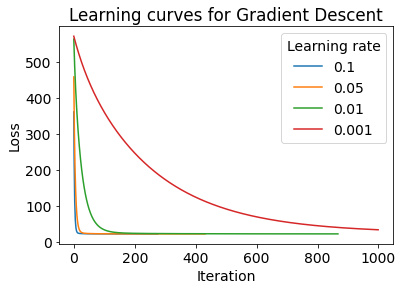

In [145]:
learning_rates = [0.1, 0.05, 0.01, 0.001]
losses = {}

for lr in learning_rates:
    olsgd = OlsGd(verbose=False, learning_rate=lr)
    olsgd.fit(X, y)
    current_loss = np.array(olsgd.loss_history)
    losses[lr] = current_loss # Take the 10th item

plot_learning_rates(losses, title='Learning curves for Gradient Descent', fig_name='olsgd_learning_rate.png')

**What is the effect of learning rate?**     
We can see that low learning rates make the model change slower, and require more iterations to converge. High learning rates allow faster convergence, but learning rate larger than 0.1 could not coverge at all (not shown due to distorted graph).

**How would you find number of iteration automatically?**    
We followed the weight values, and stoped iterating when the weight differece was smaller than 0.001.

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



$A^{2}=A^{T}A$   
$\hat{y}\,=\,Xw$   
$u^{T}A=(A^{T}u)^{T}$   
   
    
$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2 = $   
$\sum_{i=1}^{N}\left(y^{\left(i\right)}-\hat{y}^{\left(i\right)}\right)^{T}\cdot\left(y^{\left(i\right)}-\hat{y}^{\left(i\right)}\right)\,+\,\lambda w^{T}w\,= $ 
$\,\sum_{i=1}^{N}\left(y^{\left(i\right)}-X^{\left(i\right)}w\right)^{T}\cdot\left(y^{\left(i\right)}-X^{\left(i\right)}w\right)\,+\,\lambda w^{T}w$

$\frac{dL}{dw}=−2X^{T}(y−w^{T}X)\,+\,2λw$    
$\frac{dL}{dw}=0$   
$−2X^{T}(y−w^{T}X)\,+\,2λw\,=\,0$   
$λw\,=\,X^{T}(y−w^{T}X)\,$     
$X^{T}y=X^{T}Xw+λw$    
$w=(X^{T}X+λI)^{-1}X^{T}y$  



In [146]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    X = self.pad(X)
    in_brackets = np.dot(X.T, X) + np.dot(self.ridge_lambda, np.identity(X.shape[1]))
    w_ridge = np.dot(np.dot(np.linalg.pinv(in_brackets), X.T), Y)
    return w_ridge
    

In [147]:
# Using the RidgeLs class
olsrd = RidgeLs(ridge_lambda=0.01)
olsrd.fit(X, y)
print('Score:\t',olsrd.score(X, y))

Score:	 21.89528030561787


We will add the regularization, based on the derivitive from the lacture:  $\frac{dL}{dw}=X^{T}(Xw-y)+λw$  

In [148]:
class RidgeGd(OlsGd):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeGd,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda  
    
  def _derive(self, X, Y):
    """ Derives the w """
    grad_x = super()._derive(X, Y) + self.ridge_lambda * self.w
    return grad_x

In [149]:
# Using the RidgeGd class
olsrdgd = RidgeGd(ridge_lambda=0.01, verbose=False)
olsrdgd.fit(X, y)
print('Score:\t', olsrdgd.score(X, y))

Score:	 21.9225801543412


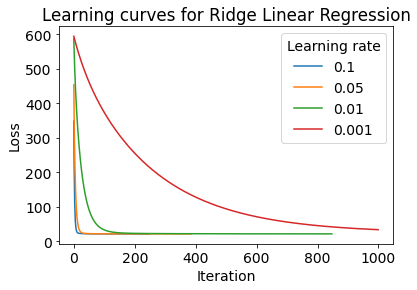

In [150]:
learning_rates = [0.1, 0.05, 0.01, 0.001]
losses = {}

for lr in learning_rates:
    olsrdgd = RidgeGd(verbose=False, learning_rate=lr, ridge_lambda=0.01)
    olsrdgd.fit(X, y)
    current_loss = np.array(olsrdgd.loss_history)
    losses[lr] = current_loss # Take the 10th item

plot_learning_rates(losses, title='Learning curves for Ridge Linear Regression', fig_name='olsrdgd_learning_rate.png')

Same as for the Gradient descent model, low learning rates make the model change slower, and require more iterations to converge.

### Use scikitlearn implementation for OLS, Ridge and Lasso

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)
lr_mse = mean_squared_error(y, lr_pred)
print('MSE for OLS:\t', lr_mse)

lrr = Ridge(alpha=0.01)
lrr.fit(X, y)
lrr_pred = lrr.predict(X)
lrr_mse = mean_squared_error(y, lrr_pred)
print('MSE for Ridge:\t', lrr_mse)

lrl = Lasso(alpha=0.01)
lrl.fit(X, y)
lrl_pred = lrl.predict(X)
lrl_mse = mean_squared_error(y, lrl_pred)
print('MSE for Lasso:\t', lrl_mse)



MSE for OLS:	 21.894831181729206
MSE for Ridge:	 21.894871212183
MSE for Lasso:	 21.931375520202067
